# Problem Statement:
Domain:-Healthcare
This ML Model would predict the Length of Stay(LOS) in prior so that proper resource would be allocated for the Patient.

In [1]:
#Check the current working Diectory:
import os
os.getcwd()

'F:\\2020\\Hackathon\\Code\\4.Healthcare'

In [2]:
#Load the required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Load the train and test data:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [4]:
#Check the header for train data:
train_data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [5]:
#Check the header for test data:
test_data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0


In [6]:
#Test data has no "Stay" column so "Stay" is the "Target or Label Column":

In [7]:
#Check the tail for the train Data:
train_data.tail()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20
318437,318438,19,a,7,Y,5,gynecology,Q,C,2.0,21641,8.0,Emergency,Minor,2,11-20,4752.0,0-10


In [8]:
#Check the tail(last 5 records or observations) for the test data:
test_data.tail()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
137052,455491,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313.0
137053,455492,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510.0
137054,455493,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190.0
137055,455494,5,a,1,X,2,anesthesia,R,E,4.0,57021,10.0,Trauma,Minor,2,41-50,5435.0
137056,455495,6,a,6,X,3,gynecology,Q,F,4.0,126729,3.0,Trauma,Extreme,5,51-60,4702.0


In [9]:
#Observations: Data is loaded Properly:

# Check the dimension:

In [10]:
#Check the dimension for the train and test data:
print("Dimension for the train_data:",train_data.shape)
print("Dimension fot the test_data:",test_data.shape)

Dimension for the train_data: (318438, 18)
Dimension fot the test_data: (137057, 17)


In [11]:
#Check the Column Names:
print(train_data.columns)
print("------------------------------------------------------------------")
print(test_data.columns)

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')
------------------------------------------------------------------
Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit'],
      dtype='object')


In [12]:
#Check the attribute types of train_data and test_data:
print("Attributes information about train_data:")
print(train_data.dtypes)
print("--------------------------------------------------------------")
print("Attributes information about test_data:")
print(test_data.dtypes)

Attributes information about train_data:
case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object
--------------------------------------------------------------
Attributes information about test_data:
case_id                         

In [13]:
train_data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [14]:
train_data.tail()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20
318437,318438,19,a,7,Y,5,gynecology,Q,C,2.0,21641,8.0,Emergency,Minor,2,11-20,4752.0,0-10


In [15]:
#Id columns and target columns be stored for further usage:
train_data_case_id = train_data[["case_id"]] 
train_data_patientid = train_data[["patientid"]]

#For test_data also:

test_data_case_id = test_data[["case_id"]]
test_data_patientid = test_data[["patientid"]]

In [16]:
#numerical and categorical data with Label(Target column) are segregated here:
#We left few columns which would be used only for the mapping purposes only,

num_attr = ["Available Extra Rooms in Hospital","Bed Grade","Visitors with Patient","Admission_Deposit"]
cat_attr = ["Hospital_code","Hospital_type_code","City_Code_Hospital","Hospital_region_code","Department","Ward_Type",
           "Ward_Facility_Code","City_Code_Patient","Type of Admission","Severity of Illness","Age"]
Stay = train_data[["Stay"]]

# Convert into appropriate types:

In [17]:
train_data[["Hospital_code"]] = train_data[["Hospital_code"]].astype(object)
train_data[["City_Code_Hospital"]] = train_data[["City_Code_Hospital"]].astype(object) 
train_data[["City_Code_Patient"]] = train_data[["City_Code_Patient"]].astype(object)


print("-----------------------------------Convert it for the train data--------------------------------")

test_data[["Hospital_code"]] = test_data[["Hospital_code"]].astype(object)
test_data[["City_Code_Hospital"]] = test_data[["City_Code_Hospital"]].astype(object)
test_data[["City_Code_Patient"]] = test_data[["City_Code_Patient"]].astype(object)
print("-----------------------------------Convert it for the test data as well--------------------------------")

-----------------------------------Convert it for the train data--------------------------------
-----------------------------------Convert it for the test data as well--------------------------------


In [18]:
#Verify the datatype for the train_data:
train_data.dtypes

case_id                                int64
Hospital_code                         object
Hospital_type_code                    object
City_Code_Hospital                    object
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                     object
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

In [19]:
#Verify the datatype for the train_data:
test_data.dtypes

case_id                                int64
Hospital_code                         object
Hospital_type_code                    object
City_Code_Hospital                    object
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                     object
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
dtype: object

In [20]:
#Check the dimension for the data:
print("The dimension for the train_data is:",train_data.shape)
print("The dimension for the test_data is:",test_data.shape)

The dimension for the train_data is: (318438, 18)
The dimension for the test_data is: (137057, 17)


In [21]:
print("Train_data attribute informations:",train_data.info())
print("----------------Separator-----------------------------")
print("Test_data attribute informations:",test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  object 
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  object 
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

# Summary of the Dataset:

In [22]:
#Describe the numerical data in train data:
print("Summary of the Numerical data in train_data:")
train_data.describe()

Summary of the Numerical data in train_data:


,case_id,Available Extra Rooms in Hospital,Bed Grade,patientid,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318325.000000,318438.000000,318438.000000,318438.000000
mean,159219.500000,3.197627,2.625807,65747.579472,3.284099,4880.749392
std,91925.276847,1.168171,0.873146,37979.936440,1.764061,1086.776254
min,1.000000,0.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,2.000000,2.000000,32847.000000,2.000000,4186.000000
50%,159219.500000,3.000000,3.000000,65724.500000,3.000000,4741.000000
75%,238828.750000,4.000000,3.000000,98470.000000,4.000000,5409.000000
max,318438.000000,24.000000,4.000000,131624.000000,32.000000,11008.000000


In [23]:
#Describe the numerical data in test data:
print("Summary of the Numerical data in test_data:")
test_data.describe()

Summary of the Numerical data in test_data:


,case_id,Available Extra Rooms in Hospital,Bed Grade,patientid,Visitors with Patient,Admission_Deposit
count,137057.000000,137057.000000,137022.000000,137057.000000,137057.000000,137057.000000
mean,386967.000000,3.192686,2.634489,65877.903515,3.284531,4869.731097
std,39565.092259,1.164250,0.869295,37942.997623,1.777270,1080.766723
min,318439.000000,0.000000,1.000000,3.000000,0.000000,1800.000000
25%,352703.000000,2.000000,2.000000,32945.000000,2.000000,4178.000000
50%,386967.000000,3.000000,3.000000,65786.000000,3.000000,4731.000000
75%,421231.000000,4.000000,3.000000,98851.000000,4.000000,5398.000000
max,455495.000000,21.000000,4.000000,131618.000000,32.000000,11920.000000


In [24]:
#Describe the categorical data in train data:
print("Summary of the Categorical data in train_data:")
train_data.describe(include="object")

Summary of the Categorical data in train_data:


,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,City_Code_Patient,Type of Admission,Severity of Illness,Age,Stay
count,318438,318438,318438,318438,318438,318438,318438,313906.0,318438,318438,318438,318438
unique,32,7,11,3,5,6,6,37.0,3,3,10,11
top,26,a,1,X,gynecology,R,F,8.0,Trauma,Moderate,41-50,21-30
freq,33076,143425,55351,133336,249486,127947,112753,124011.0,152261,175843,63749,87491


In [25]:
#Describe the categorical data in test data:
print("Summary of the Categorical data in train_data:")
test_data.describe(include="object")

Summary of the Categorical data in train_data:


,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,City_Code_Patient,Type of Admission,Severity of Illness,Age
count,137057,137057,137057,137057,137057,137057,137057,134900.0,137057,137057,137057
unique,32,7,11,3,5,6,6,37.0,3,3,10
top,26,a,1,X,gynecology,R,F,8.0,Trauma,Moderate,41-50
freq,14447,61305,23707,57513,107202,54992,48717,52814.0,65411,75722,27746


In [26]:
#Separate the numerical and categorical attributes:
#We left few columns which would be used only for the mapping purposes only,

num_attr = ["Available Extra Rooms in Hospital","Bed Grade","Visitors with Patient","Admission_Deposit"]
cat_attr = ["Hospital_code","Hospital_type_code","City_Code_Hospital","Hospital_region_code","Department","Ward_Type",
           "Ward_Facility_Code","City_Code_Patient","Type of Admission","Severity of Illness","Age"]
Stay = train_data[["Stay"]]

In [27]:
#Make separate dataframe for num_attr and cat_attr for train_data:
train_num_attr = train_data[num_attr]
train_cat_attr = train_data[cat_attr]

In [28]:
train_num_attr.head()

,Available Extra Rooms in Hospital,Bed Grade,Visitors with Patient,Admission_Deposit
0,3,2.0,2,4911.0
1,2,2.0,2,5954.0
2,2,2.0,2,4745.0
3,2,2.0,2,7272.0
4,2,2.0,2,5558.0


In [29]:
train_cat_attr.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,City_Code_Patient,Type of Admission,Severity of Illness,Age
0,8,c,3,Z,radiotherapy,R,F,7,Emergency,Extreme,51-60
1,2,c,5,Z,radiotherapy,S,F,7,Trauma,Extreme,51-60
2,10,e,1,X,anesthesia,S,E,7,Trauma,Extreme,51-60
3,26,b,2,Y,radiotherapy,R,D,7,Trauma,Extreme,51-60
4,26,b,2,Y,radiotherapy,S,D,7,Trauma,Extreme,51-60


In [30]:
#Create dataframe for test data with num_attr and cat_attr:

In [31]:
#make separate dataframe for num_attr and cat_attr for test_data:
test_num_attr = test_data[num_attr]
test_cat_attr = test_data[cat_attr]

In [32]:
test_num_attr.head()

,Available Extra Rooms in Hospital,Bed Grade,Visitors with Patient,Admission_Deposit
0,3,2.0,2,3095.0
1,2,2.0,4,4018.0
2,3,4.0,3,4492.0
3,3,2.0,3,4173.0
4,2,2.0,4,4161.0


In [33]:
test_cat_attr.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,City_Code_Patient,Type of Admission,Severity of Illness,Age
0,21,c,3,Z,gynecology,S,A,2,Emergency,Moderate,71-80
1,29,a,4,X,gynecology,S,F,2,Trauma,Moderate,71-80
2,26,b,2,Y,gynecology,Q,D,2,Emergency,Moderate,71-80
3,6,a,6,X,gynecology,Q,F,2,Trauma,Moderate,71-80
4,28,b,11,X,gynecology,R,F,2,Trauma,Moderate,71-80


# Missing Value Treatment:

In [34]:
#Missing values in train_num_attr and train_cat_attr:
print(train_num_attr.isna().sum())
print("--------------------------")
print(train_cat_attr.isna().sum())

Available Extra Rooms in Hospital      0
Bed Grade                            113
Visitors with Patient                  0
Admission_Deposit                      0
dtype: int64
--------------------------
Hospital_code              0
Hospital_type_code         0
City_Code_Hospital         0
Hospital_region_code       0
Department                 0
Ward_Type                  0
Ward_Facility_Code         0
City_Code_Patient       4532
Type of Admission          0
Severity of Illness        0
Age                        0
dtype: int64


In [35]:
#Missing values in train_num_attr and train_cat_attr in Percentage:
print(train_num_attr.isna().sum()/train_num_attr.shape[0]*100)
print("--------------------------")
print(train_cat_attr.isna().sum()/train_num_attr.shape[0]*100)

Available Extra Rooms in Hospital    0.000000
Bed Grade                            0.035486
Visitors with Patient                0.000000
Admission_Deposit                    0.000000
dtype: float64
--------------------------
Hospital_code           0.000000
Hospital_type_code      0.000000
City_Code_Hospital      0.000000
Hospital_region_code    0.000000
Department              0.000000
Ward_Type               0.000000
Ward_Facility_Code      0.000000
City_Code_Patient       1.423197
Type of Admission       0.000000
Severity of Illness     0.000000
Age                     0.000000
dtype: float64


In [36]:
#Fill the missing values using the median(Numerical data) mode(Categorical data) for the categorical data:
median1 = train_num_attr["Bed Grade"].median()
import statistics
mode1 = statistics.mode(train_cat_attr["City_Code_Patient"])
#or mode1 = train_cat_attr["City_Code_Patient"].mode()[0]
print(median1)
print(mode1)

3.0
8.0


In [37]:
train_num_attr["Bed Grade"].replace(np.nan,median1,inplace=True)
train_cat_attr["City_Code_Patient"].replace(np.nan,mode1,inplace=True)

C:\Users\HARIOHM\anaconda3\lib\site-packages\pandas\core\series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [38]:
#Check missing values once again after Imputation  in train_num_attr and train_cat_attr:
print(train_num_attr.isna().sum())
print("--------------------------")
print(train_cat_attr.isna().sum())
#Observation:It is filled.

Available Extra Rooms in Hospital    0
Bed Grade                            0
Visitors with Patient                0
Admission_Deposit                    0
dtype: int64
--------------------------
Hospital_code           0
Hospital_type_code      0
City_Code_Hospital      0
Hospital_region_code    0
Department              0
Ward_Type               0
Ward_Facility_Code      0
City_Code_Patient       0
Type of Admission       0
Severity of Illness     0
Age                     0
dtype: int64


In [39]:
#Missing values in test_num_attr and test_cat_attr in Percentage:
print(test_num_attr.isna().sum()/test_num_attr.shape[0]*100)
print("--------------------------")
print(test_cat_attr.isna().sum()/test_num_attr.shape[0]*100)

Available Extra Rooms in Hospital    0.000000
Bed Grade                            0.025537
Visitors with Patient                0.000000
Admission_Deposit                    0.000000
dtype: float64
--------------------------
Hospital_code           0.000000
Hospital_type_code      0.000000
City_Code_Hospital      0.000000
Hospital_region_code    0.000000
Department              0.000000
Ward_Type               0.000000
Ward_Facility_Code      0.000000
City_Code_Patient       1.573798
Type of Admission       0.000000
Severity of Illness     0.000000
Age                     0.000000
dtype: float64


In [40]:
#Fill the missing values using the median(Numerical data) mode(Categorical data) for the categorical data:
median2 = test_num_attr["Bed Grade"].median()
import statistics
mode2 = statistics.mode(test_cat_attr["City_Code_Patient"])
#or mode1 = train_cat_attr["City_Code_Patient"].mode()[0]
print(median2)
print(mode2)

3.0
8.0


In [41]:
test_num_attr["Bed Grade"].replace(np.nan,median2,inplace=True)
test_cat_attr["City_Code_Patient"].replace(np.nan,mode2,inplace=True)

In [42]:
# Check the Missing values in test_num_attr and test_cat_attr in Percentage once again:
print(test_num_attr.isna().sum()/test_num_attr.shape[0]*100)
print("--------------------------")
print(test_cat_attr.isna().sum()/test_num_attr.shape[0]*100)

Available Extra Rooms in Hospital    0.0
Bed Grade                            0.0
Visitors with Patient                0.0
Admission_Deposit                    0.0
dtype: float64
--------------------------
Hospital_code           0.0
Hospital_type_code      0.0
City_Code_Hospital      0.0
Hospital_region_code    0.0
Department              0.0
Ward_Type               0.0
Ward_Facility_Code      0.0
City_Code_Patient       0.0
Type of Admission       0.0
Severity of Illness     0.0
Age                     0.0
dtype: float64


In [43]:
#Observation: Values are imputed. Missing Values are filled.

# Outlier Treatment:

<AxesSubplot:>

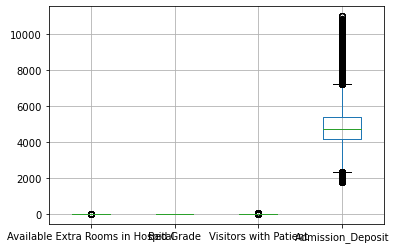

In [44]:
#Use the Box and Whisker Plot:

train_num_attr.boxplot(column = num_attr)

<AxesSubplot:>

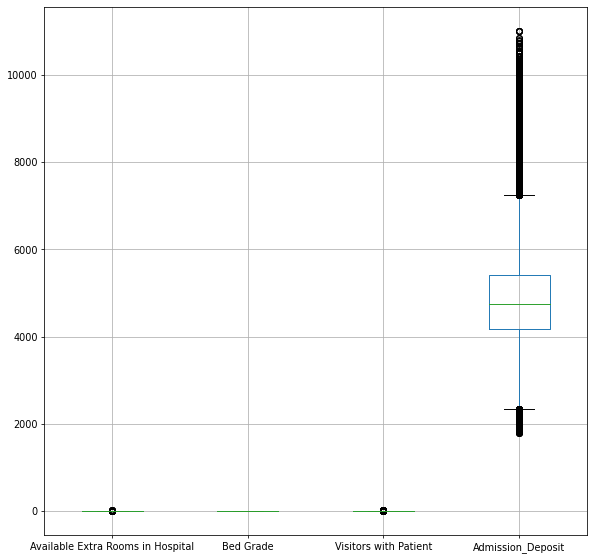

In [45]:
#Increase the Size of the Graph:
width_in_inches = 10
height_in_inches = 10
dots_per_inch = 70

plt.figure(
    figsize=(width_in_inches, height_in_inches),
    dpi=dots_per_inch)
train_num_attr.boxplot(column = num_attr)

In [46]:
#It is observed that outlier is present. 
#as per the domain understanding it migh not 
#But statistically it has outlier present.
#We can treat the Outlier by:
#1. Drop the Outlier
#2. Replace the outlier Values using IQR

In [47]:
#Create a user defined function called remove_outlier for getting the threshold value from IQR.
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range,upper_range

In [48]:
#Remove the Outlier from Admission_Deposit:
lowincome,uppincome=remove_outlier(train_num_attr["Admission_Deposit"])
train_num_attr[["Admission_Deposit"]] = np.where(train_num_attr[["Admission_Deposit"]]>uppincome,uppincome,train_num_attr[["Admission_Deposit"]])
train_num_attr[["Admission_Deposit"]] = np.where(train_num_attr[["Admission_Deposit"]]<lowincome,lowincome,train_num_attr[["Admission_Deposit"]])

C:\Users\HARIOHM\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HARIOHM\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\HARIOHM\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

<AxesSubplot:>

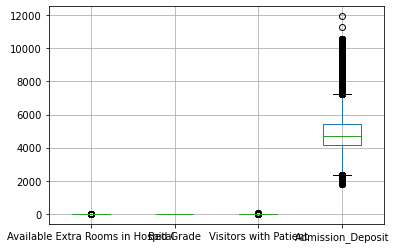

In [49]:
#Sometimes we can also check the outlier in Test_data if it doesnot impact on the business requirement.
test_num_attr.boxplot()

<AxesSubplot:>

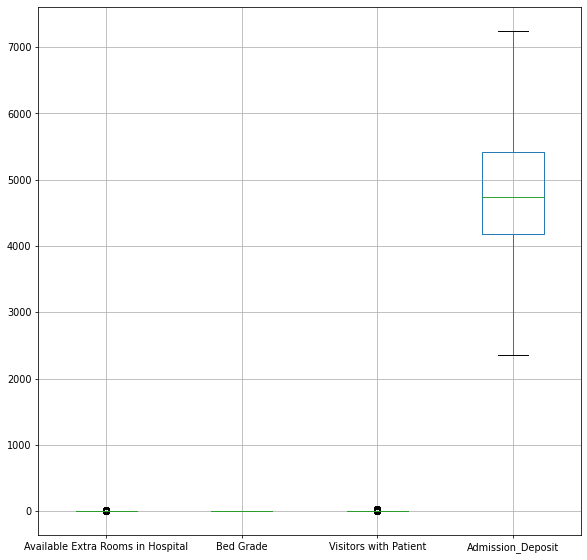

In [50]:
#Increase the Size of the Graph:
width_in_inches = 10
height_in_inches = 10
dots_per_inch = 70

plt.figure(
    figsize=(width_in_inches, height_in_inches),
    dpi=dots_per_inch)
train_num_attr.boxplot(column = num_attr)

In [51]:
#There is no Outlier present as per the observation in test_num_attr data.

# Scaling through Standardizations:

In [52]:
from sklearn.preprocessing import StandardScaler
StdScale = StandardScaler()

In [53]:
#Scale the train_num_attr  data(Only Numerical data):
train_num_attr[['Available Extra Rooms in Hospital']] = StdScale.fit_transform(train_num_attr[['Available Extra Rooms in Hospital']])
train_num_attr[['Bed Grade']] = StdScale.fit_transform(train_num_attr[['Bed Grade']])
train_num_attr[['Visitors with Patient']] = StdScale.fit_transform(train_num_attr[['Visitors with Patient']])
train_num_attr[['Admission_Deposit']] = StdScale.fit_transform(train_num_attr[['Admission_Deposit']])


C:\Users\HARIOHM\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HARIOHM\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\HARIOHM\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [54]:
train_num_attr.head()

,Available Extra Rooms in Hospital,Bed Grade,Visitors with Patient,Admission_Deposit
0,-0.169177,-0.716984,-0.727923,0.058583
1,-1.025217,-0.716984,-0.727923,1.101176
2,-1.025217,-0.716984,-0.727923,-0.107352
3,-1.025217,-0.716984,-0.727923,2.390173
4,-1.025217,-0.716984,-0.727923,0.705331


In [55]:
#Scale the test_num_attr  data(Only Numerical data):
test_num_attr[['Available Extra Rooms in Hospital']] = StdScale.fit_transform(test_num_attr[['Available Extra Rooms in Hospital']])
test_num_attr[['Bed Grade']] = StdScale.fit_transform(test_num_attr[['Bed Grade']])
test_num_attr[['Visitors with Patient']] = StdScale.fit_transform(test_num_attr[['Visitors with Patient']])
test_num_attr[['Admission_Deposit']] = StdScale.fit_transform(test_num_attr[['Admission_Deposit']])

C:\Users\HARIOHM\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HARIOHM\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\HARIOHM\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [56]:
test_num_attr.head()

,Available Extra Rooms in Hospital,Bed Grade,Visitors with Patient,Admission_Deposit
0,-0.165503,-0.730077,-0.722758,-1.642110
1,-1.024428,-0.730077,0.402568,-0.788083
2,-0.165503,1.570889,-0.160095,-0.349504
3,-0.165503,-0.730077,-0.160095,-0.644666
4,-1.024428,-0.730077,0.402568,-0.655769


In [57]:
#Encode the categorical data of train_cat_attr data:
dummies1 = pd.get_dummies(train_cat_attr[['Hospital_code',
 'Hospital_type_code',
 'City_Code_Hospital',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code','City_Code_Patient','Type of Admission','Severity of Illness','Age']],drop_first=True)
dummies1.head()

,City_Code_Patient,Hospital_code_2,Hospital_code_3,Hospital_code_4,Hospital_code_5,Hospital_code_6,Hospital_code_7,Hospital_code_8,Hospital_code_9,Hospital_code_10,...,Severity of Illness_Moderate,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100
0,7.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,7.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,7.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,7.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,7.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [58]:
#Encode the categorical data of train_cat_attr data:
dummies2 = pd.get_dummies(test_cat_attr[['Hospital_code',
 'Hospital_type_code',
 'City_Code_Hospital',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code','City_Code_Patient','Type of Admission','Severity of Illness','Age']],drop_first=True)
dummies1.head()

,City_Code_Patient,Hospital_code_2,Hospital_code_3,Hospital_code_4,Hospital_code_5,Hospital_code_6,Hospital_code_7,Hospital_code_8,Hospital_code_9,Hospital_code_10,...,Severity of Illness_Moderate,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100
0,7.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,7.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,7.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,7.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,7.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [59]:
#Combine the scaled train_num_attr and dummies1:
#Combine the numerical and Categorical data for train_data:
#Combine the train_num_attr and dummies1:
train_final = pd.concat([train_num_attr,dummies1,Stay],axis=1)
train_final.head()

,Available Extra Rooms in Hospital,Bed Grade,Visitors with Patient,Admission_Deposit,City_Code_Patient,Hospital_code_2,Hospital_code_3,Hospital_code_4,Hospital_code_5,Hospital_code_6,...,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100,Stay
0,-0.169177,-0.716984,-0.727923,0.058583,7.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0-10
1,-1.025217,-0.716984,-0.727923,1.101176,7.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,41-50
2,-1.025217,-0.716984,-0.727923,-0.107352,7.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,31-40
3,-1.025217,-0.716984,-0.727923,2.390173,7.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,41-50
4,-1.025217,-0.716984,-0.727923,0.705331,7.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,41-50


In [60]:
#Combine the scaled test_num_attr and dummies2:
#Combine the numerical and Categorical data for test_data:
#Combine the tesr_num_attr and dummies2:
test_final = pd.concat([test_num_attr,dummies2],axis=1)
test_final.head()

,Available Extra Rooms in Hospital,Bed Grade,Visitors with Patient,Admission_Deposit,City_Code_Patient,Hospital_code_2,Hospital_code_3,Hospital_code_4,Hospital_code_5,Hospital_code_6,...,Severity of Illness_Moderate,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100
0,-0.165503,-0.730077,-0.722758,-1.642110,2.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,-1.024428,-0.730077,0.402568,-0.788083,2.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,-0.165503,1.570889,-0.160095,-0.349504,2.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,-0.165503,-0.730077,-0.160095,-0.644666,2.0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,-1.024428,-0.730077,0.402568,-0.655769,2.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [61]:
#Our train and test data is processed
#New Dimesnion for the train_final and test_final data:
print("Dimension for the train_final:",train_final.shape)
print("Dimension for the test_final:",test_final.shape)

In [62]:
#Train_columns:
train_final.columns

Index(['Available Extra Rooms in Hospital', 'Bed Grade',
       'Visitors with Patient', 'Admission_Deposit', 'City_Code_Patient',
       'Hospital_code_2', 'Hospital_code_3', 'Hospital_code_4',
       'Hospital_code_5', 'Hospital_code_6', 'Hospital_code_7',
       'Hospital_code_8', 'Hospital_code_9', 'Hospital_code_10',
       'Hospital_code_11', 'Hospital_code_12', 'Hospital_code_13',
       'Hospital_code_14', 'Hospital_code_15', 'Hospital_code_16',
       'Hospital_code_17', 'Hospital_code_18', 'Hospital_code_19',
       'Hospital_code_20', 'Hospital_code_21', 'Hospital_code_22',
       'Hospital_code_23', 'Hospital_code_24', 'Hospital_code_25',
       'Hospital_code_26', 'Hospital_code_27', 'Hospital_code_28',
       'Hospital_code_29', 'Hospital_code_30', 'Hospital_code_31',
       'Hospital_code_32', 'Hospital_type_code_b', 'Hospital_type_code_c',
       'Hospital_type_code_d', 'Hospital_type_code_e', 'Hospital_type_code_f',
       'Hospital_type_code_g', 'City_Code_Hospital_2'

In [63]:
#Test Columns:
test_final.columns

Index(['Available Extra Rooms in Hospital', 'Bed Grade',
       'Visitors with Patient', 'Admission_Deposit', 'City_Code_Patient',
       'Hospital_code_2', 'Hospital_code_3', 'Hospital_code_4',
       'Hospital_code_5', 'Hospital_code_6', 'Hospital_code_7',
       'Hospital_code_8', 'Hospital_code_9', 'Hospital_code_10',
       'Hospital_code_11', 'Hospital_code_12', 'Hospital_code_13',
       'Hospital_code_14', 'Hospital_code_15', 'Hospital_code_16',
       'Hospital_code_17', 'Hospital_code_18', 'Hospital_code_19',
       'Hospital_code_20', 'Hospital_code_21', 'Hospital_code_22',
       'Hospital_code_23', 'Hospital_code_24', 'Hospital_code_25',
       'Hospital_code_26', 'Hospital_code_27', 'Hospital_code_28',
       'Hospital_code_29', 'Hospital_code_30', 'Hospital_code_31',
       'Hospital_code_32', 'Hospital_type_code_b', 'Hospital_type_code_c',
       'Hospital_type_code_d', 'Hospital_type_code_e', 'Hospital_type_code_f',
       'Hospital_type_code_g', 'City_Code_Hospital_2'

In [64]:
#We know the target column is "Stay":
train_final[["Stay"]].value_counts()

Stay              
21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
dtype: int64

In [73]:
#Data Distribution for the Stay(Target_Column):
print("Value Percentage wise in target column Stay:")
train_final[["Stay"]].value_counts()/train_final.shape[0]*100

Value Percentage wise in target column Stay:


Stay              
21-30                 27.475050
11-20                 24.538215
31-40                 17.321739
51-60                 10.996803
0-10                   7.412432
41-50                  3.687688
71-80                  3.220093
More than 100 Days     2.098682
81-90                  1.519291
91-100                 0.868301
61-70                  0.861706
dtype: float64

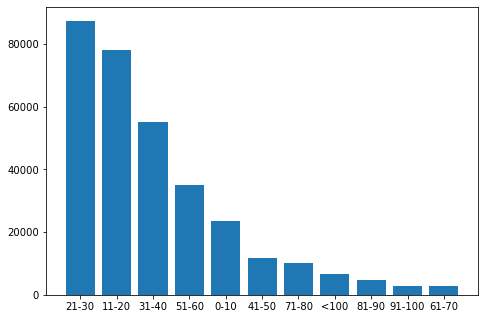

In [74]:

#Data Distribution for Target values:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Age_group = ["21-30","11-20","31-40","51-60","0-10","41-50","71-80","<100","81-90","91-100","61-70"]
frequency = [87491,78139,55159,35018,23604,11743,10254,6683,4838,2765,2744]
ax.bar(Age_group,frequency)
plt.show()

In [75]:
#Drop the "is_promoted" in train_final data:
train_final.drop(["Stay"],axis=1,inplace=True)

In [77]:
#Split train_final into train and test:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train_final,Stay,test_size=0.20,random_state=123)

# 1. Logistic Regression:

In [78]:
#Build the LogisticRegression:
from sklearn.linear_model import LogisticRegression
LogR = LogisticRegression(solver="lbfgs")
#Build the Model:
LogR.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HARIOHM\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [79]:
#Predict on X_train itself to verify with the actual result:
pred_X_train = LogR.predict(X_train)

In [80]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_log = LogR.predict(X_test)
pred_test_log = LogR.predict(test_final)

In [81]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_log = classification_report(pred_X_train,y_train)
result_X_test_log = classification_report(pred_X_test_log,y_test)
print("-----Result on Train Data-----------")
print(result_X_train_log)
print("-----Result on Validation Data------")
print(result_X_test_log)
#classification_report()

C:\Users\HARIOHM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-----Result on Train Data-----------
                    precision    recall  f1-score   support

              0-10       0.08      0.42      0.14      3612
             11-20       0.45      0.40      0.42     70515
             21-30       0.67      0.41      0.51    112951
             31-40       0.20      0.32      0.25     28016
             41-50       0.00      0.00      0.00         0
             51-60       0.47      0.37      0.41     35813
             61-70       0.00      0.00      0.00         0
             71-80       0.00      0.17      0.00         6
             81-90       0.00      0.09      0.00        11
            91-100       0.00      0.00      0.00         0
More than 100 Days       0.36      0.51      0.42      3826

          accuracy                           0.39    254750
         macro avg       0.20      0.24      0.20    254750
      weighted avg       0.52      0.39      0.44    254750

-----Result on Validation Data------
                    pre

In [82]:
#Concat the case_id and pred_test_log:
Sub_Log = pd.concat([test_data_case_id,pd.Series(pred_test_log)],axis=1)

In [83]:
Sub_Log.head()

,case_id,0
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60


In [84]:
Sub_Log.rename(columns={0:"Stay"},inplace=True)

In [85]:
Sub_Log.head()

,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60


In [86]:
#Export Result into Local System:
Sub_Log.to_csv("1.Sub_Log.csv",index=False)

In [87]:
#Result On Portal:
#Your score for this submission is : 39.46859609655256,

# 2. KNN Classifier

In [88]:
#Build the KNN Model(Modelless) Algorithm:
from sklearn.neighbors import KNeighborsClassifier
KNN_class = KNeighborsClassifier(n_neighbors = 5,metric = "minkowski",p=2)
#Build the Model:
KNN_class.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


KNeighborsClassifier()

In [89]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_KNN = KNN_class.predict(X_train)

In [90]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_KNN = KNN_class.predict(X_test)
pred_test_KNN = KNN_class.predict(test_final)

In [91]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_KNN = classification_report(pred_X_train_KNN,y_train)
result_X_test_KNN = classification_report(pred_X_test_KNN,y_test)
print("-----Result on Train Data-----------")
print(result_X_train_KNN)
print("-----Result on Validation Data------")
print(result_X_test_KNN)
#classification_report()

-----Result on Train Data-----------
                    precision    recall  f1-score   support

              0-10       0.45      0.43      0.44     19560
             11-20       0.69      0.51      0.59     83962
             21-30       0.66      0.56      0.61     83153
             31-40       0.41      0.52      0.46     34414
             41-50       0.11      0.45      0.18      2308
             51-60       0.46      0.57      0.51     22391
             61-70       0.05      0.46      0.09       236
             71-80       0.21      0.54      0.31      3242
             81-90       0.27      0.61      0.37      1696
            91-100       0.14      0.56      0.23       558
More than 100 Days       0.44      0.73      0.55      3230

          accuracy                           0.53    254750
         macro avg       0.35      0.54      0.39    254750
      weighted avg       0.59      0.53      0.55    254750

-----Result on Validation Data------
                    pre

In [92]:
#Concat the test_data_case_id and pred_test:
Sub_KNN = pd.concat([test_data_case_id,pd.Series(pred_test_KNN)],axis=1)

In [93]:
Sub_KNN.head()

,case_id,0
0,318439,21-30
1,318440,51-60
2,318441,21-30
3,318442,11-20
4,318443,51-60


In [94]:
#Rename the ColumnName:
Sub_KNN.rename(columns = {0:"Stay"},inplace=True)

In [95]:
Sub_KNN.head()

,case_id,Stay
0,318439,21-30
1,318440,51-60
2,318441,21-30
3,318442,11-20
4,318443,51-60


In [96]:
Sub_KNN.to_csv("2.sub_KNN.csv",index=False)

In [97]:
#Result on Portal:
#

# 3.Naive Bayes

In [98]:
from sklearn.naive_bayes import GaussianNB
GNB_class = GaussianNB()
#Build the Model:
GNB_class.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [99]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_NB = GNB_class.predict(X_train)

In [100]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_NB = GNB_class.predict(X_test)
pred_test_NB = GNB_class.predict(test_final)

In [101]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_NB = classification_report(pred_X_train_NB,y_train)
result_X_test_NB = classification_report(pred_X_test_NB,y_test)
print("-----Result on Train Data-----------")
print(result_X_train_NB)
print("-----Result on Validation Data------")
print(result_X_test_NB)
#classification_report()

-----Result on Train Data-----------
                    precision    recall  f1-score   support

              0-10       0.14      0.15      0.14     17114
             11-20       0.28      0.37      0.32     47278
             21-30       0.10      0.42      0.16     16451
             31-40       0.00      0.04      0.00        26
             41-50       0.46      0.06      0.10     74236
             51-60       0.13      0.17      0.15     20327
             61-70       0.07      0.02      0.03      7741
             71-80       0.03      0.04      0.03      5297
             81-90       0.22      0.04      0.07     21638
            91-100       0.17      0.01      0.03     25521
More than 100 Days       0.39      0.11      0.17     19121

          accuracy                           0.15    254750
         macro avg       0.18      0.13      0.11    254750
      weighted avg       0.28      0.15      0.14    254750

-----Result on Validation Data------
                    pre

In [107]:
#Concat the test_data_case_id and pred_test:
Sub_NB = pd.concat([test_data_case_id,pd.Series(pred_test_NB)],axis=1)

In [108]:
Sub_NB.head()

,case_id,0
0,318439,More than 100 Days
1,318440,91-100
2,318441,41-50
3,318442,21-30
4,318443,91-100


In [109]:
Sub_NB.rename(columns = {0:"Stay"},inplace=True)

In [110]:
#Download into Local System:
Sub_NB.to_csv("3.Sub_NB.csv",index=False)

In [111]:
#Result on Portal:
#

# 4. Decision Tree Classifier:

In [112]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
#Build the Model:
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [113]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_DT = DT.predict(X_train)

In [114]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_DT = DT.predict(X_test)
pred_test_DT = DT.predict(test_final)

In [115]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_DT = classification_report(pred_X_train_DT,y_train)
result_X_test_DT = classification_report(pred_X_test_DT,y_test)
print("-----Result on Train Data-----------")
print(result_X_train_DT)
print("-----Result on Validation Data------")
print(result_X_test_DT)
#classification_report()

-----Result on Train Data-----------
                    precision    recall  f1-score   support

              0-10       1.00      1.00      1.00     18929
             11-20       1.00      1.00      1.00     62590
             21-30       1.00      1.00      1.00     70029
             31-40       1.00      1.00      1.00     44053
             41-50       1.00      1.00      1.00      9394
             51-60       1.00      1.00      1.00     27971
             61-70       1.00      1.00      1.00      2188
             71-80       1.00      1.00      1.00      8236
             81-90       1.00      1.00      1.00      3856
            91-100       1.00      1.00      1.00      2183
More than 100 Days       1.00      1.00      1.00      5321

          accuracy                           1.00    254750
         macro avg       1.00      1.00      1.00    254750
      weighted avg       1.00      1.00      1.00    254750

-----Result on Validation Data------
                    pre

In [116]:
#Concat the test_employee_id and pred_test:
Sub_DT = pd.concat([test_data_case_id ,pd.Series(pred_test_DT)],axis=1)

In [117]:
Sub_DT.head()

,case_id,0
0,318439,21-30
1,318440,71-80
2,318441,11-20
3,318442,11-20
4,318443,51-60


In [118]:
#Rename the Column:
Sub_DT.rename(columns = {0:"stay"},inplace=True)

In [119]:
#Download into Local System:
Sub_DT.to_csv("4.Sub_DT.csv",index=False)


In [120]:
#Result on Portal:

# 5. Random Forest:

In [121]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
#Build the Model:
rf.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier()

In [122]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_rf = rf.predict(X_train)

In [123]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_rf = rf.predict(X_test)
pred_test_rf = rf.predict(test_final)

In [124]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_rf = classification_report(pred_X_train_rf,y_train)
result_X_test_rf = classification_report(pred_X_test_rf,y_test)
print("--------------------------Result on Train Data-----------")
print(result_X_train_rf)
print("--------------------------Result on Validation Data------")
print(result_X_test_rf)
#classification_report()

--------------------------Result on Train Data-----------
                    precision    recall  f1-score   support

              0-10       1.00      1.00      1.00     18871
             11-20       1.00      1.00      1.00     62543
             21-30       1.00      1.00      1.00     70077
             31-40       1.00      1.00      1.00     44082
             41-50       1.00      1.00      1.00      9398
             51-60       1.00      1.00      1.00     27985
             61-70       1.00      1.00      1.00      2188
             71-80       1.00      1.00      1.00      8244
             81-90       1.00      1.00      1.00      3856
            91-100       1.00      1.00      1.00      2183
More than 100 Days       1.00      1.00      1.00      5323

          accuracy                           1.00    254750
         macro avg       1.00      1.00      1.00    254750
      weighted avg       1.00      1.00      1.00    254750

--------------------------Result on Val

In [125]:
#Concat the test_employee_id and pred_test:
Sub_rf = pd.concat([test_data_case_id,pd.Series(pred_test_rf)],axis=1)

In [126]:
Sub_rf.head()

,case_id,0
0,318439,0-10
1,318440,51-60
2,318441,0-10
3,318442,21-30
4,318443,51-60


In [127]:
Sub_rf.rename(columns={0:"Stay"},inplace=True)

In [128]:
Sub_rf.head()

,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,0-10
3,318442,21-30
4,318443,51-60


In [129]:
#Download into Local System:
Sub_DT.to_csv("5.Sub_rf.csv",index=False)

In [130]:
#Result on Portal:

# 6. GradientBoosting Classifier:

In [131]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier()
#Model building
GB.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingClassifier()

In [132]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_GB = GB.predict(X_train)#Concat the test_ID and pred_test:


In [133]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_GB = rf.predict(X_test)
pred_test_GB = rf.predict(test_final)

In [134]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_GB = classification_report(pred_X_train_GB,y_train)
result_X_test_GB = classification_report(pred_X_test_GB,y_test)
print("--------------------------Result on Train Data-----------")
print(result_X_train_GB)
print("--------------------------Result on Validation Data------")
print(result_X_test_GB)
#classification_report()

--------------------------Result on Train Data-----------
                    precision    recall  f1-score   support

              0-10       0.11      0.43      0.18      5022
             11-20       0.50      0.42      0.46     74943
             21-30       0.66      0.42      0.52    109338
             31-40       0.17      0.41      0.24     18144
             41-50       0.00      0.85      0.00        27
             51-60       0.55      0.39      0.45     39763
             61-70       0.02      0.66      0.03        50
             71-80       0.01      0.40      0.03       293
             81-90       0.27      0.35      0.30      2935
            91-100       0.03      0.64      0.06       112
More than 100 Days       0.41      0.53      0.46      4123

          accuracy                           0.42    254750
         macro avg       0.25      0.50      0.25    254750
      weighted avg       0.54      0.42      0.46    254750

--------------------------Result on Val

In [135]:
#Concat the test_data_case_id and pred_test:
Sub_GB = pd.concat([test_data_case_id,pd.Series(pred_test_GB)],axis=1)

In [136]:
Sub_GB.head()

,case_id,0
0,318439,0-10
1,318440,51-60
2,318441,0-10
3,318442,21-30
4,318443,51-60


In [137]:
Sub_GB.rename(columns = {0:"Stay"},inplace=True)

In [138]:
Sub_GB.to_csv("6.Sub_GB.csv",index=False)

In [139]:
#Result on Portal:

# 7.Hist Gradient Boosting Classifier

In [140]:
#NOTE: This is still experiemental:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
HGB = HistGradientBoostingClassifier()
#Build Model:
HGB.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


HistGradientBoostingClassifier()

In [141]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_HGB = HGB.predict(X_train)

In [142]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_HGB = HGB.predict(X_test)
pred_test_HGB = HGB.predict(test_final)

In [143]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_HGB = classification_report(pred_X_train_HGB,y_train)
result_X_test_HGB = classification_report(pred_X_test_HGB,y_test)
print("--------------------------Result on Train Data-----------")
print(result_X_train_HGB)
print("--------------------------Result on Validation Data------")
print(result_X_test_HGB)
#classification_report()

--------------------------Result on Train Data-----------
                    precision    recall  f1-score   support

              0-10       0.18      0.44      0.25      7684
             11-20       0.52      0.45      0.48     72751
             21-30       0.68      0.44      0.53    108814
             31-40       0.24      0.46      0.31     23107
             41-50       0.01      0.81      0.01        77
             51-60       0.52      0.43      0.47     34058
             61-70       0.04      0.79      0.08       121
             71-80       0.05      0.58      0.10       759
             81-90       0.35      0.46      0.39      2887
            91-100       0.12      0.52      0.19       485
More than 100 Days       0.46      0.61      0.53      4007

          accuracy                           0.44    254750
         macro avg       0.29      0.54      0.30    254750
      weighted avg       0.55      0.44      0.48    254750

--------------------------Result on Val

In [144]:
#Concat the test_employee_id and pred_test:
Sub_HGB = pd.concat([test_data_case_id,pd.Series(pred_test_HGB)],axis=1)

In [145]:
Sub_HGB.head()

,case_id,0
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60


In [146]:
Sub_HGB.rename(columns={0:"Stay"},inplace=True)

In [147]:
Sub_HGB.head()

,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60


In [148]:
Sub_HGB.to_csv("7.Sub_HGB.csv",index=False)

In [149]:
#Result on Portal:

# 8. Adaboost Classifier

In [150]:
#Adaboost Classifier:
from sklearn.ensemble import AdaBoostClassifier
AD = AdaBoostClassifier()
#Build Model:
AD = AD.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [151]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_AD = AD.predict(X_train)

In [152]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_AD = AD.predict(X_test)
pred_test_AD = AD.predict(test_final)

In [153]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_AD = classification_report(pred_X_train_AD,y_train)
result_X_test_AD = classification_report(pred_X_test_AD,y_test)
print("--------------------------Result on Train Data-----------")
print(result_X_train_AD)
print("--------------------------Result on Validation Data------")
print(result_X_test_AD)
#classification_report()

C:\Users\HARIOHM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


--------------------------Result on Train Data-----------
                    precision    recall  f1-score   support

              0-10       0.16      0.19      0.17     16041
             11-20       0.39      0.38      0.38     63933
             21-30       0.60      0.41      0.49    103919
             31-40       0.21      0.30      0.25     31175
             41-50       0.00      0.14      0.00         7
             51-60       0.43      0.35      0.39     34070
             61-70       0.00      0.00      0.00         0
             71-80       0.00      0.07      0.00        14
             81-90       0.03      0.10      0.05      1363
            91-100       0.00      0.00      0.00         0
More than 100 Days       0.33      0.41      0.36      4228

          accuracy                           0.36    254750
         macro avg       0.20      0.21      0.19    254750
      weighted avg       0.44      0.36      0.39    254750

--------------------------Result on Val

In [154]:
#Concat the test_data_case_id and pred_test_AD:
Sub_AD = pd.concat([test_data_case_id,pd.Series(pred_test_AD)],axis=1)

In [155]:
Sub_AD.head()

,case_id,0
0,318439,21-30
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,31-40


In [156]:
Sub_AD.rename(columns = {0:"Stay"},inplace=True)

In [157]:
Sub_AD.head()

,case_id,Stay
0,318439,21-30
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,31-40


In [158]:
Sub_AD.to_csv("8.Sub_AD.csv",index=False)

In [159]:
#Result On POrtal:

# 9.SVM

# 10.XGBoost Classifier:

In [160]:
# check xgboost version
import xgboost
print(xgboost.__version__)
#Note: If it is not installed then install using below command:
#sudo pip install xgboost

1.2.0


In [161]:
#Xgboost Classifier:
import xgboost
from xgboost import XGBClassifier
XGB = XGBClassifier()
#Build the Model:
XGB.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [162]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_XGB = XGB.predict(X_train)

In [163]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_XGB = XGB.predict(X_test)
pred_test_XGB = XGB.predict(test_final)

In [164]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_XGB = classification_report(pred_X_train_XGB,y_train)
result_X_test_XGB = classification_report(pred_X_test_XGB,y_test)
print("--------------------------Result on Train Data-----------")
print(result_X_train_XGB)
print("--------------------------Result on Validation Data------")
print(result_X_test_XGB)
#classification_report()

--------------------------Result on Train Data-----------
                    precision    recall  f1-score   support

              0-10       0.20      0.48      0.28      7837
             11-20       0.53      0.46      0.50     71961
             21-30       0.69      0.45      0.54    109370
             31-40       0.26      0.48      0.33     23213
             41-50       0.02      0.82      0.05       277
             51-60       0.56      0.46      0.51     33977
             61-70       0.05      0.91      0.09       110
             71-80       0.09      0.72      0.17      1073
             81-90       0.40      0.61      0.48      2566
            91-100       0.11      0.89      0.20       282
More than 100 Days       0.52      0.68      0.59      4084

          accuracy                           0.46    254750
         macro avg       0.31      0.63      0.34    254750
      weighted avg       0.57      0.46      0.49    254750

--------------------------Result on Val

In [165]:
#Concat the test_data_case_id and pred_test_SVC:
Sub_XGB = pd.concat([test_data_case_id,pd.Series(pred_test_XGB)],axis=1)

In [166]:
Sub_XGB.head()

,case_id,0
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60


In [167]:
Sub_XGB.rename(columns={0:"Stay"},inplace=True)

In [168]:
Sub_XGB.to_csv("10.Sub_XGB.csv",index=False)

In [169]:
#Result on Portal:

# 11.LightGBM

In [170]:
#install the LightGBM:
#!pip install lightgbm
#sudo pip install lightgbm

In [171]:
#import LightGradient Boosting Machine:
import lightgbm
print(lightgbm.__version__)

3.0.0


In [172]:
from lightgbm import LGBMClassifier
LGBM= LGBMClassifier()
#Building the Model:
LGBM.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LGBMClassifier()

In [173]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_LGBM = LGBM.predict(X_train)

In [174]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_LGBM = LGBM.predict(X_test)
pred_test_LGBM = LGBM.predict(test_final)

In [175]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_LGBM = classification_report(pred_X_train_LGBM,y_train)
result_X_test_LGBM = classification_report(pred_X_test_LGBM,y_test)
print("--------------------------Result on Train Data for LGBM:-----------")
print(result_X_train_LGBM)
print("--------------------------Result on Validation Data LGBM:------")
print(result_X_test_LGBM)
#classification_report()

--------------------------Result on Train Data for LGBM:-----------
                    precision    recall  f1-score   support

              0-10       0.18      0.44      0.25      7513
             11-20       0.52      0.45      0.48     72865
             21-30       0.68      0.43      0.53    109193
             31-40       0.24      0.45      0.31     23222
             41-50       0.01      0.86      0.01        69
             51-60       0.52      0.43      0.47     34153
             61-70       0.04      0.85      0.08       111
             71-80       0.05      0.62      0.09       625
             81-90       0.33      0.50      0.40      2565
            91-100       0.12      0.66      0.20       391
More than 100 Days       0.47      0.62      0.54      4043

          accuracy                           0.44    254750
         macro avg       0.29      0.57      0.31    254750
      weighted avg       0.55      0.44      0.48    254750

--------------------------Res

In [176]:
#Concat the test_data_case_id and pred_test_SVC:
Sub_LGBM = pd.concat([test_data_case_id,pd.Series(pred_test_LGBM)],axis=1)

In [177]:
Sub_LGBM.head()

,case_id,0
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60


In [178]:
Sub_LGBM.rename(columns={0:"Stay"},inplace=True)

In [179]:
Sub_LGBM.head()

,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60


In [180]:
Sub_LGBM.to_csv("11.Sub_LGBM.csv",index=False)

In [181]:
#Result on Portal:

# 12.Gradient Boosting with CatBoost

In [182]:
#It is also third party library:
#Installing catboost:
!pip install catboost
#sudo pip install catboost

In [183]:
#Check the catboost version:
import catboost
print(catboost.__version__)

0.24.2


In [184]:
from catboost import CatBoostClassifier
catb = CatBoostClassifier()
#Build the Model:
catb.fit(X_train,y_train)

Learning rate set to 0.104963
0:	learn: 2.2225227	total: 1.14s	remaining: 18m 55s
1:	learn: 2.1049765	total: 1.94s	remaining: 16m 9s
2:	learn: 2.0194033	total: 2.73s	remaining: 15m 7s
3:	learn: 1.9517511	total: 3.78s	remaining: 15m 40s
4:	learn: 1.8980764	total: 4.62s	remaining: 15m 19s
5:	learn: 1.8534904	total: 5.32s	remaining: 14m 40s
6:	learn: 1.8164576	total: 6.05s	remaining: 14m 18s
7:	learn: 1.7857066	total: 6.86s	remaining: 14m 10s
8:	learn: 1.7568023	total: 7.56s	remaining: 13m 52s
9:	learn: 1.7340705	total: 8.31s	remaining: 13m 42s
10:	learn: 1.7142376	total: 9.12s	remaining: 13m 39s
11:	learn: 1.6957495	total: 9.98s	remaining: 13m 41s
12:	learn: 1.6796525	total: 10.8s	remaining: 13m 39s
13:	learn: 1.6660313	total: 11.5s	remaining: 13m 31s
14:	learn: 1.6547131	total: 12.2s	remaining: 13m 22s
15:	learn: 1.6441075	total: 12.9s	remaining: 13m 15s
16:	learn: 1.6350936	total: 13.7s	remaining: 13m 13s
17:	learn: 1.6274321	total: 14.4s	remaining: 13m 7s
18:	learn: 1.6205008	total: 1

153:	learn: 1.5057800	total: 2m 2s	remaining: 11m 10s
154:	learn: 1.5055316	total: 2m 2s	remaining: 11m 9s
155:	learn: 1.5052571	total: 2m 3s	remaining: 11m 8s
156:	learn: 1.5049424	total: 2m 4s	remaining: 11m 7s
157:	learn: 1.5046306	total: 2m 4s	remaining: 11m 6s
158:	learn: 1.5044488	total: 2m 5s	remaining: 11m 5s
159:	learn: 1.5042458	total: 2m 6s	remaining: 11m 4s
160:	learn: 1.5040533	total: 2m 7s	remaining: 11m 3s
161:	learn: 1.5037644	total: 2m 8s	remaining: 11m 3s
162:	learn: 1.5035280	total: 2m 8s	remaining: 11m 2s
163:	learn: 1.5033459	total: 2m 9s	remaining: 11m
164:	learn: 1.5031699	total: 2m 10s	remaining: 10m 59s
165:	learn: 1.5029539	total: 2m 11s	remaining: 10m 58s
166:	learn: 1.5025689	total: 2m 11s	remaining: 10m 58s
167:	learn: 1.5022168	total: 2m 12s	remaining: 10m 57s
168:	learn: 1.5019813	total: 2m 13s	remaining: 10m 56s
169:	learn: 1.5017791	total: 2m 14s	remaining: 10m 55s
170:	learn: 1.5015809	total: 2m 15s	remaining: 10m 54s
171:	learn: 1.5013969	total: 2m 15

305:	learn: 1.4763544	total: 3m 59s	remaining: 9m 2s
306:	learn: 1.4762655	total: 4m	remaining: 9m 1s
307:	learn: 1.4761964	total: 4m	remaining: 9m 1s
308:	learn: 1.4761209	total: 4m 1s	remaining: 9m
309:	learn: 1.4760271	total: 4m 2s	remaining: 8m 59s
310:	learn: 1.4759480	total: 4m 3s	remaining: 8m 58s
311:	learn: 1.4758647	total: 4m 3s	remaining: 8m 57s
312:	learn: 1.4757253	total: 4m 4s	remaining: 8m 57s
313:	learn: 1.4755911	total: 4m 5s	remaining: 8m 56s
314:	learn: 1.4755249	total: 4m 6s	remaining: 8m 55s
315:	learn: 1.4754014	total: 4m 7s	remaining: 8m 54s
316:	learn: 1.4753102	total: 4m 7s	remaining: 8m 54s
317:	learn: 1.4752014	total: 4m 8s	remaining: 8m 53s
318:	learn: 1.4750758	total: 4m 9s	remaining: 8m 52s
319:	learn: 1.4749497	total: 4m 10s	remaining: 8m 51s
320:	learn: 1.4747902	total: 4m 11s	remaining: 8m 51s
321:	learn: 1.4746295	total: 4m 11s	remaining: 8m 50s
322:	learn: 1.4744896	total: 4m 12s	remaining: 8m 49s
323:	learn: 1.4744284	total: 4m 13s	remaining: 8m 48s


459:	learn: 1.4578975	total: 5m 59s	remaining: 7m 1s
460:	learn: 1.4578322	total: 6m	remaining: 7m
461:	learn: 1.4577811	total: 6m	remaining: 7m
462:	learn: 1.4576509	total: 6m 1s	remaining: 6m 59s
463:	learn: 1.4575344	total: 6m 2s	remaining: 6m 58s
464:	learn: 1.4574376	total: 6m 2s	remaining: 6m 57s
465:	learn: 1.4573325	total: 6m 3s	remaining: 6m 56s
466:	learn: 1.4572853	total: 6m 4s	remaining: 6m 55s
467:	learn: 1.4571216	total: 6m 5s	remaining: 6m 55s
468:	learn: 1.4569354	total: 6m 6s	remaining: 6m 54s
469:	learn: 1.4568771	total: 6m 6s	remaining: 6m 53s
470:	learn: 1.4567543	total: 6m 7s	remaining: 6m 52s
471:	learn: 1.4565739	total: 6m 8s	remaining: 6m 52s
472:	learn: 1.4564718	total: 6m 9s	remaining: 6m 51s
473:	learn: 1.4563636	total: 6m 9s	remaining: 6m 50s
474:	learn: 1.4562901	total: 6m 10s	remaining: 6m 49s
475:	learn: 1.4561713	total: 6m 11s	remaining: 6m 49s
476:	learn: 1.4560959	total: 6m 12s	remaining: 6m 48s
477:	learn: 1.4559298	total: 6m 13s	remaining: 6m 47s
478

613:	learn: 1.4421721	total: 7m 58s	remaining: 5m 1s
614:	learn: 1.4420958	total: 7m 59s	remaining: 5m
615:	learn: 1.4420210	total: 8m	remaining: 4m 59s
616:	learn: 1.4419443	total: 8m 1s	remaining: 4m 58s
617:	learn: 1.4418799	total: 8m 2s	remaining: 4m 58s
618:	learn: 1.4417534	total: 8m 3s	remaining: 4m 57s
619:	learn: 1.4416844	total: 8m 3s	remaining: 4m 56s
620:	learn: 1.4415939	total: 8m 4s	remaining: 4m 55s
621:	learn: 1.4414254	total: 8m 5s	remaining: 4m 55s
622:	learn: 1.4413649	total: 8m 6s	remaining: 4m 54s
623:	learn: 1.4412053	total: 8m 6s	remaining: 4m 53s
624:	learn: 1.4410982	total: 8m 7s	remaining: 4m 52s
625:	learn: 1.4409436	total: 8m 8s	remaining: 4m 51s
626:	learn: 1.4408552	total: 8m 9s	remaining: 4m 51s
627:	learn: 1.4407373	total: 8m 10s	remaining: 4m 50s
628:	learn: 1.4406414	total: 8m 10s	remaining: 4m 49s
629:	learn: 1.4405598	total: 8m 11s	remaining: 4m 48s
630:	learn: 1.4404986	total: 8m 12s	remaining: 4m 47s
631:	learn: 1.4404248	total: 8m 13s	remaining: 4

766:	learn: 1.4284240	total: 9m 58s	remaining: 3m 1s
767:	learn: 1.4283788	total: 9m 59s	remaining: 3m 1s
768:	learn: 1.4283270	total: 10m	remaining: 3m
769:	learn: 1.4282152	total: 10m 1s	remaining: 2m 59s
770:	learn: 1.4281097	total: 10m 2s	remaining: 2m 58s
771:	learn: 1.4280202	total: 10m 2s	remaining: 2m 58s
772:	learn: 1.4279221	total: 10m 3s	remaining: 2m 57s
773:	learn: 1.4278546	total: 10m 4s	remaining: 2m 56s
774:	learn: 1.4277395	total: 10m 5s	remaining: 2m 55s
775:	learn: 1.4277085	total: 10m 5s	remaining: 2m 54s
776:	learn: 1.4276402	total: 10m 6s	remaining: 2m 54s
777:	learn: 1.4275208	total: 10m 7s	remaining: 2m 53s
778:	learn: 1.4274559	total: 10m 8s	remaining: 2m 52s
779:	learn: 1.4273308	total: 10m 9s	remaining: 2m 51s
780:	learn: 1.4272338	total: 10m 9s	remaining: 2m 51s
781:	learn: 1.4271630	total: 10m 10s	remaining: 2m 50s
782:	learn: 1.4270786	total: 10m 11s	remaining: 2m 49s
783:	learn: 1.4270152	total: 10m 12s	remaining: 2m 48s
784:	learn: 1.4269137	total: 10m 1

917:	learn: 1.4150151	total: 12m 3s	remaining: 1m 4s
918:	learn: 1.4149486	total: 12m 4s	remaining: 1m 3s
919:	learn: 1.4148563	total: 12m 5s	remaining: 1m 3s
920:	learn: 1.4147833	total: 12m 5s	remaining: 1m 2s
921:	learn: 1.4146779	total: 12m 6s	remaining: 1m 1s
922:	learn: 1.4145993	total: 12m 7s	remaining: 1m
923:	learn: 1.4144976	total: 12m 7s	remaining: 59.9s
924:	learn: 1.4144486	total: 12m 8s	remaining: 59.1s
925:	learn: 1.4143682	total: 12m 9s	remaining: 58.3s
926:	learn: 1.4142874	total: 12m 10s	remaining: 57.5s
927:	learn: 1.4141884	total: 12m 11s	remaining: 56.7s
928:	learn: 1.4141054	total: 12m 11s	remaining: 55.9s
929:	learn: 1.4140276	total: 12m 12s	remaining: 55.1s
930:	learn: 1.4139250	total: 12m 13s	remaining: 54.4s
931:	learn: 1.4138462	total: 12m 14s	remaining: 53.6s
932:	learn: 1.4137474	total: 12m 14s	remaining: 52.8s
933:	learn: 1.4136231	total: 12m 15s	remaining: 52s
934:	learn: 1.4135414	total: 12m 16s	remaining: 51.2s
935:	learn: 1.4134822	total: 12m 17s	remai

In [185]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_catb = catb.predict(X_train)

In [186]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_catb = catb.predict(X_test)
pred_test_catb =catb.predict(test_final)

In [187]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_catb = classification_report(pred_X_train_catb,y_train)
result_X_test_catb = classification_report(pred_X_test_catb,y_test)
print("--------------------------Result on Train Data for Catb:-----------")
print(result_X_train_catb)
print("--------------------------Result on Validation Data Catb:------")
print(result_X_test_catb)
#classification_report()

--------------------------Result on Train Data for Catb:-----------
                    precision    recall  f1-score   support

              0-10       0.20      0.46      0.28      8070
             11-20       0.54      0.46      0.50     73087
             21-30       0.69      0.45      0.54    107958
             31-40       0.26      0.47      0.34     24538
             41-50       0.01      0.68      0.02       149
             51-60       0.54      0.45      0.49     33271
             61-70       0.02      0.83      0.04        54
             71-80       0.07      0.67      0.12       814
             81-90       0.35      0.54      0.43      2518
            91-100       0.06      0.85      0.11       149
More than 100 Days       0.49      0.63      0.55      4142

          accuracy                           0.46    254750
         macro avg       0.29      0.59      0.31    254750
      weighted avg       0.56      0.46      0.49    254750

--------------------------Res

In [188]:
#Concat the test_data_case_id and pred_test_catb:
Sub_catb = pd.concat([test_data_case_id,pd.DataFrame(pred_test_catb)],axis=1)

In [189]:
Sub_catb.head()

,case_id,0
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60


In [190]:
Sub_catb.rename(columns={0:'Stay'},inplace=True)

In [191]:
Sub_catb.head()

,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60


In [192]:
Sub_catb.to_csv("12.Sub_catb.csv",index=False)

In [ ]:
#Result on Portal: